# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:



## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [24]:
!pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [26]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [27]:
print(df.shape)
df.sample(5)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1121,4713,1979,PhD,Married,31605.0,1,0,22-11-2012,15,74,...,7,0,0,0,0,0,0,3,11,0
274,10967,1963,Graduation,Divorced,33378.0,1,1,06-02-2013,38,33,...,7,0,0,0,0,0,0,3,11,0
891,7108,1965,Master,Widow,51390.0,1,1,08-09-2012,54,205,...,5,0,0,0,0,0,0,3,11,0
405,194,1965,Graduation,Married,48006.0,1,1,09-06-2014,55,23,...,6,0,0,0,0,0,0,3,11,0
1022,6059,1953,PhD,Together,64504.0,1,2,04-03-2013,81,986,...,7,0,0,0,0,0,0,3,11,1


## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [28]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Вывод:**
1. Всего значений 2240. В графе Income (годовой доход семьи) имеются пропуски.
2. У клиентов компании максимум в семье 2 ребенка или 2 подростка.
3. Максимальное количество дней с момента последней покупки клиента - 99 дней. Значит, все клиенты, представленные в датасете, являются действующими. То есть нет тех, кто уже годами ничего не покупал.
4. Максимальная сумма, потраченная на вино составляет 1493 (ед). Медианное и среднее арифметическое отличаются примерно на 10%.
5. На фрукты максимум было потрачено 199 (ед). Вино приносит больше выручки.
6. На мясо максимум клиенты тратили 1725. При этом медианное значение и среднее сильно отличаются. Это говорит о том, что тут возможны выбросы. Или же неравномерно распределены траты по данной категории.
7. На рыбу максимум было потрачено 259 (ед.)
8. Скорее всего данный магазин больше ориентируется на продаже мяса и вина. Данные категории пользуются большим спросом и на них больше тратят денег.
9. На сладости максимально тратили 263 (ед.). Медианное и среднее значения сильно разнятся.
10. На золото было потрачено максимум 362 (ед.) Скорее всего данный продукт является попутным. Возможно этот небольшая лавка.
11. Через вебсайт клиенты совершали максимум 27 покупок. Возможно магазн начинается развиваться в сети. На аналогичном уровне находятся продажи по каталогу.

**Дополнительные выводы для дальнейших исследований:**
1. 2240 строк, 29 столбцов.
2. Имеются пропуски в столбце income.
3. Все колонки представлены числовыми значениями. Хотя имеются категориальные значения: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, Complain.
4. Данные представленные количеством: NumWebVisitsMonth, NumStorePurchases, NumCatalogPurchases, NumWebPurchases, Kidhome, Teenhome, Recency, NumDealsPurchases.
5. Имеются непонятные значения (буду удалять или разбираться): Z_CostContact, Z_Revenue.
6. Значения представленные в виде денежных сумм: Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds.

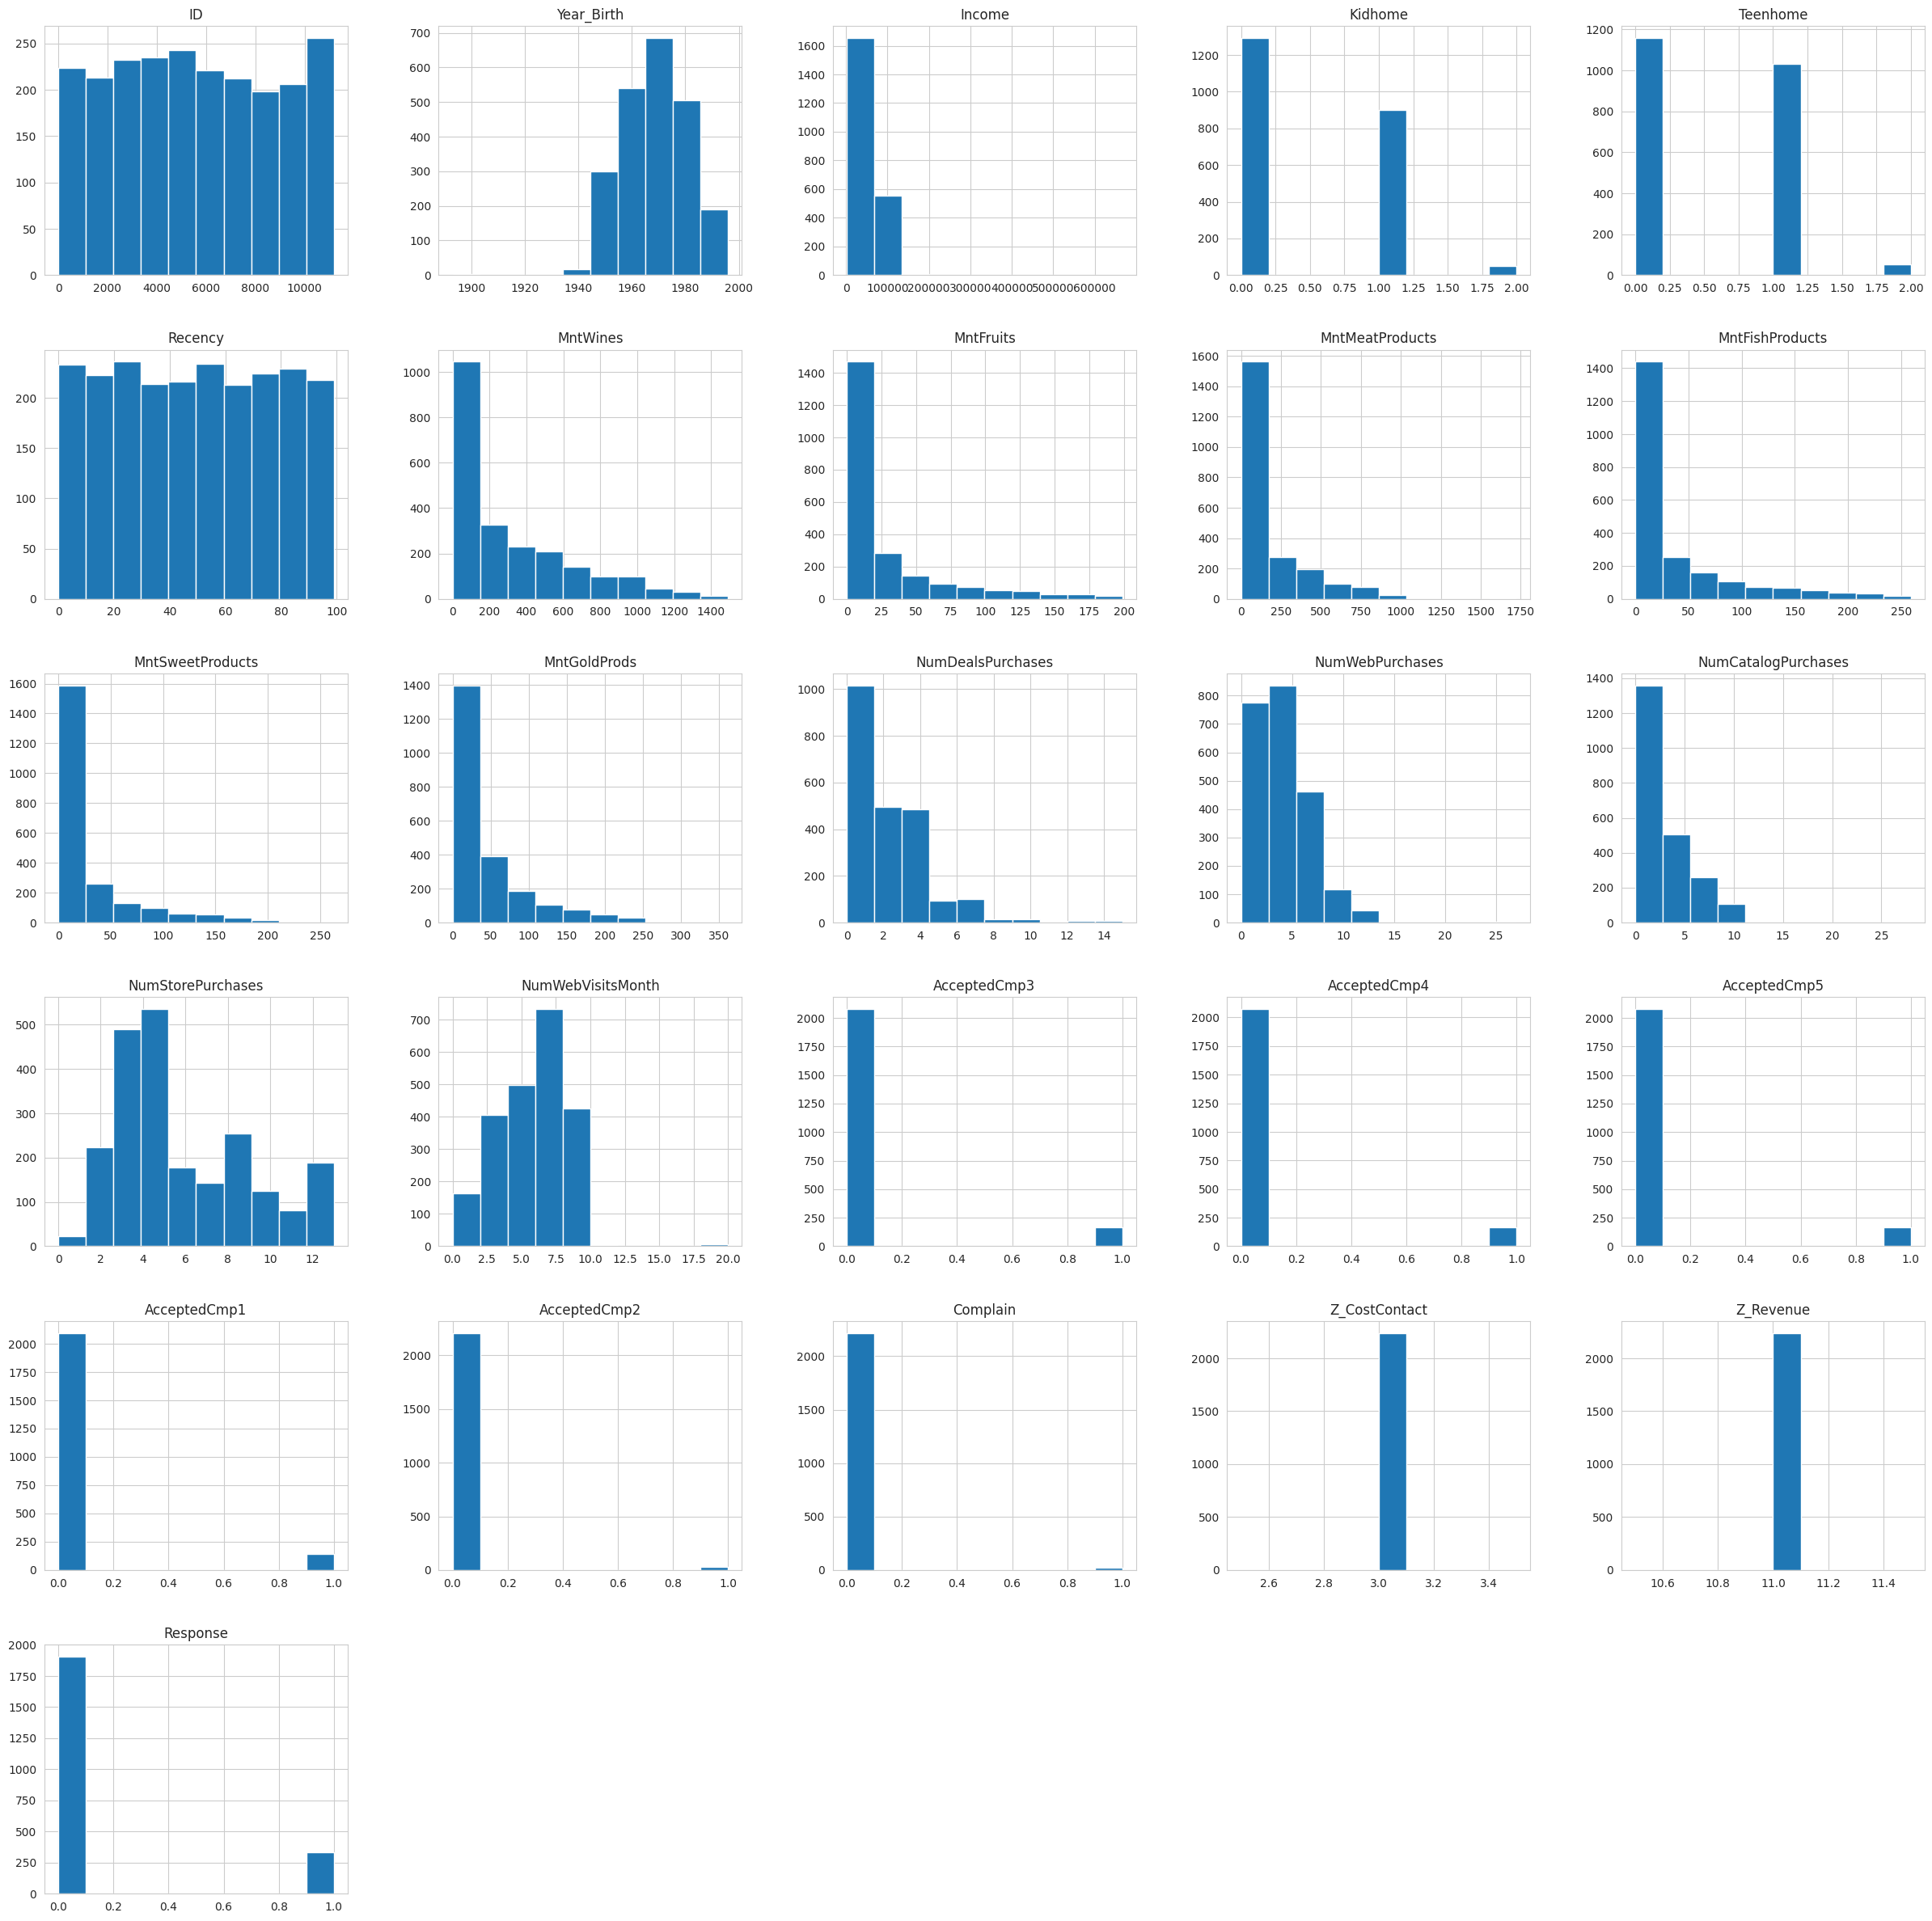

In [29]:
df.hist(figsize=(30,30));

**Выводы**
1. Столбец, где указан год рождения, имеет нормальное распределение.
2. Столбцы AcceptedCmp2, Complain, Z_CostContact, Z_Revenue - не являются информативными. По всему столбцу стоит одинаковое значение. На мой взгляд, эти столбцы в рамках данного исследования вполне можно удалить.
3. Столбцы NumStorePurchases и NumWebVisitsMonth стремятся к нормальному распределению. То есть клиенты совержают покупки в магазине равномерно.
4. Столбцы ID и Recency малоинформативны.
5. Столбцы MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds не имеют нормального распределения. Очень малое количество людей покупает очень много. А большиинство берет маленькими объемами. Возможно есть семьи, которые закупаются на длительный срок или оптом.

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [30]:
df.duplicated().sum()

0

Дубликатов нет, удалять их не требуется

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [31]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Имеется 24 пропуска в графе, где указан годовой доход семьи. Полагаю, что семьи могли просто отказатся предоставлять подобного рода данные. Поскольку данных меньше 10 процентов, я бы удалила данные строки.

In [32]:
df.dropna(axis=0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

**Вывод:**
1. Данные представлены в адекватном виде, можно оставить в таком формате.
2. Пропущенные строки были удалены.

## Визуализация

Общая визуализация гистограм представлена выше.
Провизуализируем ящики с усами.
Последующую визуализацию планирую провести, аргументируя ответы заказчика, чтобы не ссылаться на ранее построенные графики.

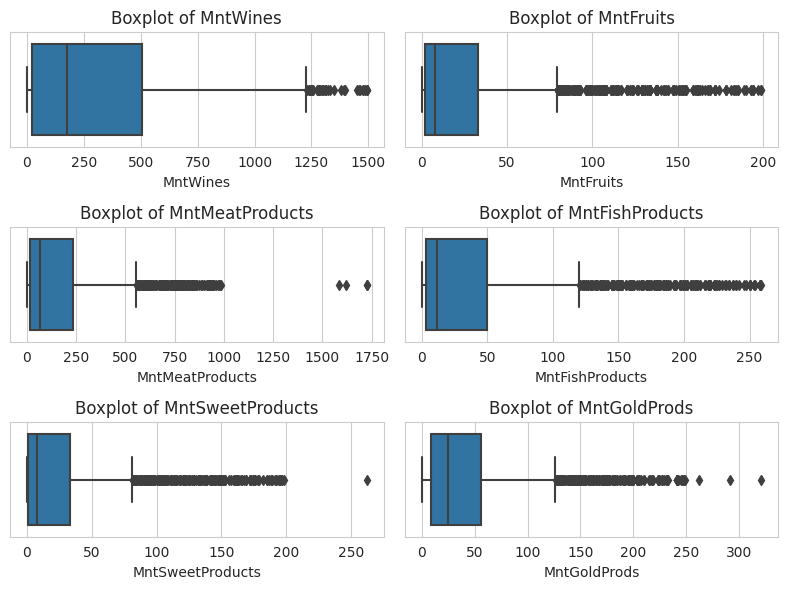

In [34]:
numerical_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


**Вывод:**
1. Магазин является универсальным. В нем предсталены, как продукты питания, так и золото, алкоголь и другие группы товаров. Тут можно покупать в самом магазиине, через интернет и через каталог.
2. Есть клиенты, которые тратят очень много и им меньшинство. Во возрастному признаку клиенты распределены нормально.
3. По всем категориям покупателей присутствуют выбросы. Возможно это некоторое количество оптовых закупщиков.

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?**

Данную информацию можно получить из описательной таблицы:

In [35]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Тут мы видим, что в среднем (берем медианное) на вино тратится 305 единиц, на фрукты - 26, на мясо - 167, на рыбу - 38, на сладости 27, на золото - 44. Самые прибыльные товары - вино и мясо.

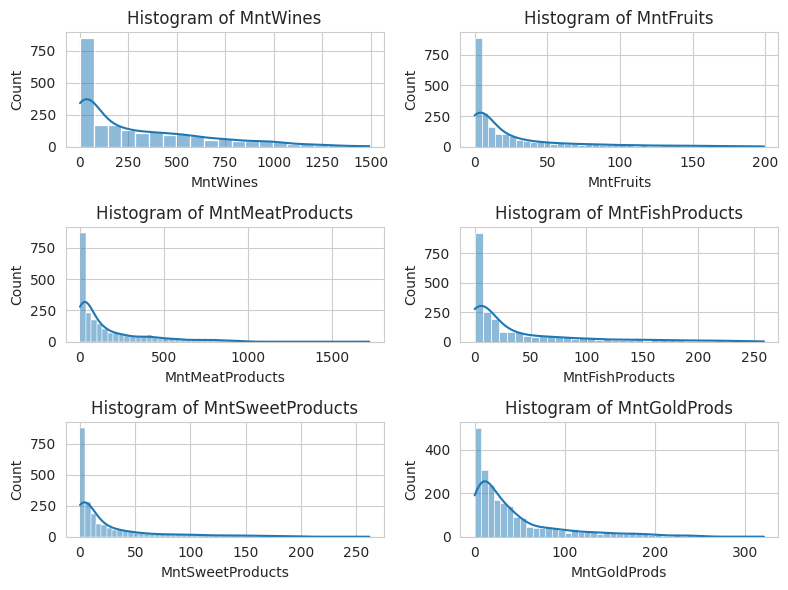

In [36]:
# гистограммы для числовых признаков
numerical_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

**Ответ**
 - Развиваем направление мяса и вина.

**2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?**

Заменим столбец с годом рождения на возраст и построим гистограмму.

In [37]:
df['Year_Birth'] = 2023 - df['Year_Birth']

In [38]:
df['Year_Birth']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Year_Birth, Length: 2216, dtype: int64

In [39]:
# необходимо теперь переименовать столбец, поскольку тут уже представлен возраст, а не год рождения
df.rename(columns={'Year_Birth':'age'},inplace=True)
df.describe()

,ID,age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,54.179603,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,27.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,46.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,53.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,64.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,130.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Средний возраст 54 года (медианный). Средний арифметический - 12 - показатель странный, возможно есть некорректные данные.

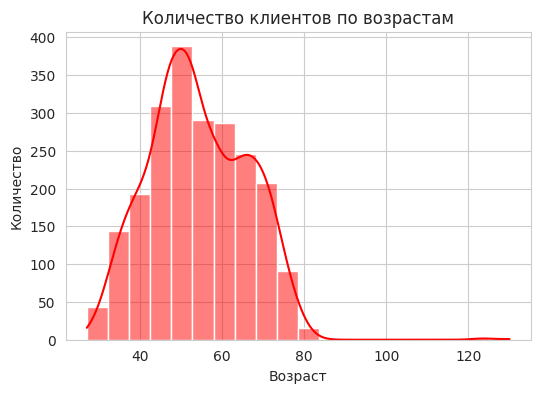

In [40]:
# гистограмма зависимости возраста от количества клиентов
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=20, kde=True, color='Red')
plt.title('Количество клиентов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

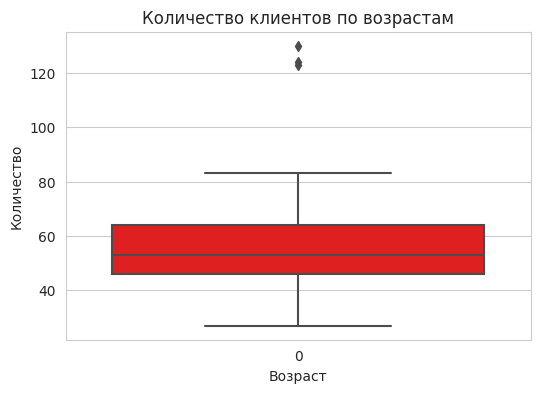

In [60]:
# гистограмма зависимости возраста от количества клиентов
plt.figure(figsize=(6, 4))
sns.boxplot(df['age'], color='Red')
plt.title('Количество клиентов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Удалим выбросы

In [61]:
df = df[(df.age < 100)]

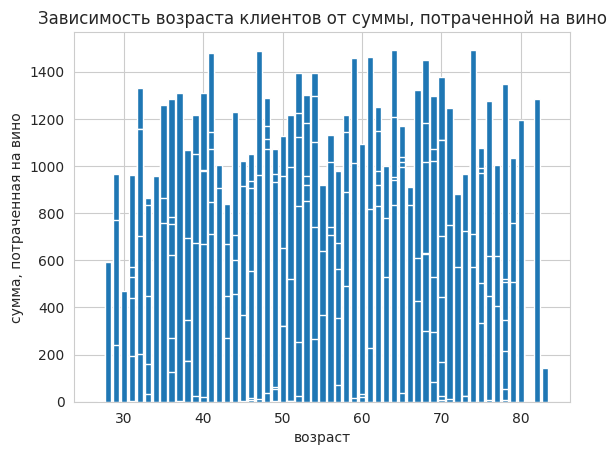

In [62]:
plt.bar(df['age'], df['MntWines'])
plt.title('Зависимость возраста клиентов от суммы, потраченной на вино')
plt.xlabel('возраст')
plt.ylabel('сумма, потраченная на вино')
plt.show()

Сразу видим выброс в виде значения 120 лет.

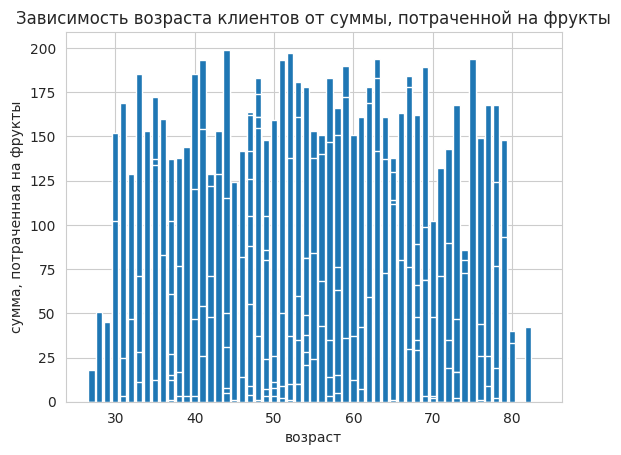

In [63]:
plt.bar(df['age'], df['MntFruits'])
plt.title('Зависимость возраста клиентов от суммы, потраченной на фрукты')
plt.xlabel('возраст')
plt.ylabel('сумма, потраченная на фрукты')
plt.show()

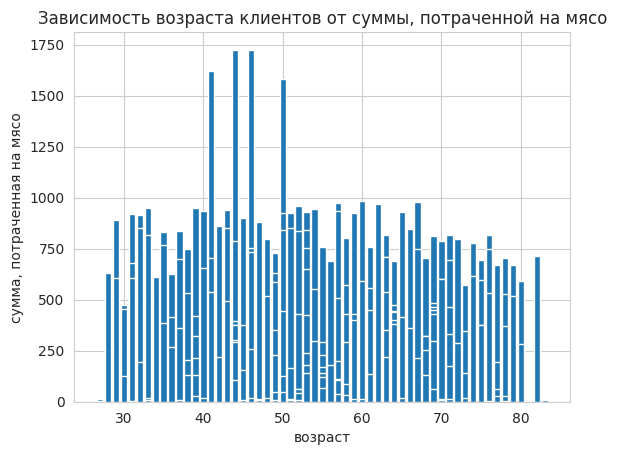

In [64]:
plt.bar(df['age'], df['MntMeatProducts'])
plt.title('Зависимость возраста клиентов от суммы, потраченной на мясо')
plt.xlabel('возраст')
plt.ylabel('сумма, потраченная на мясо')
plt.show()

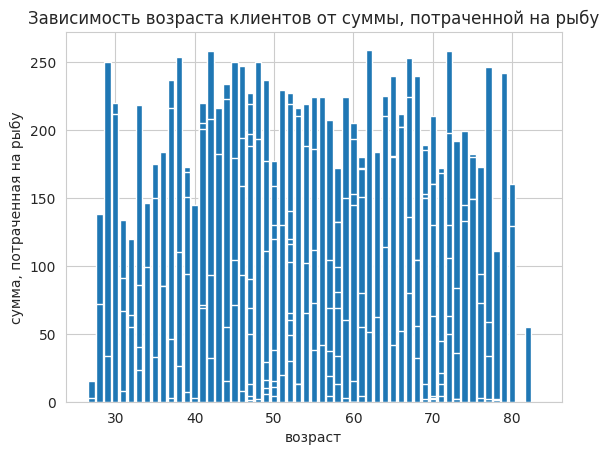

In [65]:
plt.bar(df['age'], df['MntFishProducts'])
plt.title('Зависимость возраста клиентов от суммы, потраченной на рыбу')
plt.xlabel('возраст')
plt.ylabel('сумма, потраченная на рыбу')
plt.show()

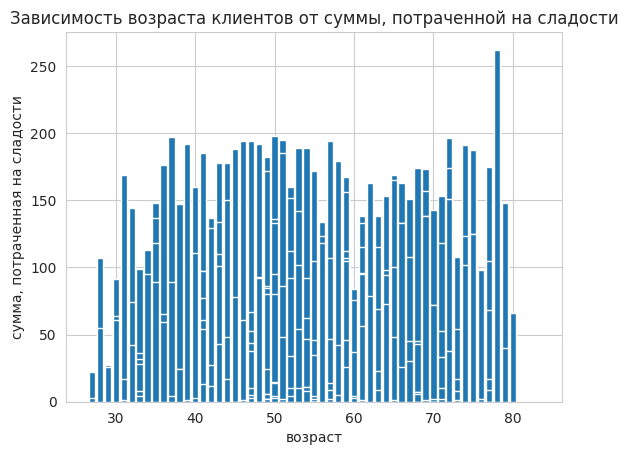

In [66]:
plt.bar(df['age'], df['MntSweetProducts'])
plt.title('Зависимость возраста клиентов от суммы, потраченной на сладости')
plt.xlabel('возраст')
plt.ylabel('сумма, потраченная на сладости')
plt.show()

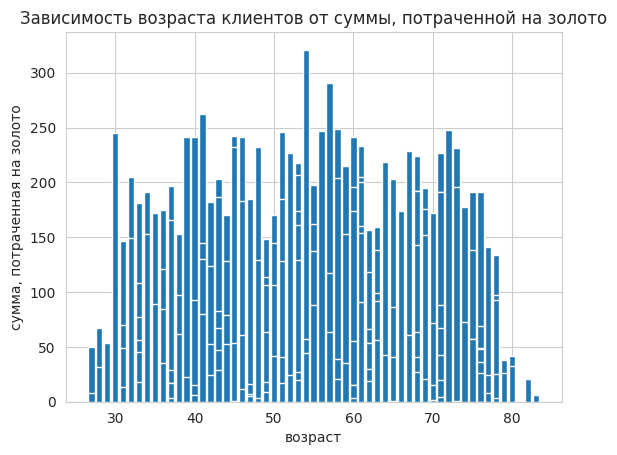

In [67]:
plt.bar(df['age'], df['MntGoldProds'])
plt.title('Зависимость возраста клиентов от суммы, потраченной на золото')
plt.xlabel('возраст')
plt.ylabel('сумма, потраченная на золото')
plt.show()

**Ответ**:
1. Средний возраст 54 года.
2. Люди в возрасте 40-50 лет больше тратят денег на мясо и на золото, относителььно других категорий.
3. Остальные группы распределены равномерно по возрастам.

**3. Тратят ли клиенты больше денег, если у него много детей и иждивенцев?**

In [68]:
kids = df[['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
kids.corr()

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,1.000000,-0.039485,-0.497407,-0.373305,-0.439192,-0.388777,-0.378014,-0.355095
Teenhome,-0.039485,1.000000,0.004312,-0.175736,-0.260778,-0.204954,-0.162794,-0.018315
MntWines,-0.497407,0.004312,1.000000,0.385892,0.568189,0.397035,0.389731,0.391604
MntFruits,-0.373305,-0.175736,0.385892,1.000000,0.546767,0.593062,0.571498,0.393503
MntMeatProducts,-0.439192,-0.260778,0.568189,0.546767,1.000000,0.573054,0.534713,0.357675
MntFishProducts,-0.388777,-0.204954,0.397035,0.593062,0.573054,1.000000,0.583548,0.426385
MntSweetProducts,-0.378014,-0.162794,0.389731,0.571498,0.534713,0.583548,1.000000,0.356868
MntGoldProds,-0.355095,-0.018315,0.391604,0.393503,0.357675,0.426385,0.356868,1.000000


**Ответ:**
- Корелляция отрицательная, зависимость не установлена

**4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?**

Для данного вопроса построим столбчатую диаграмму

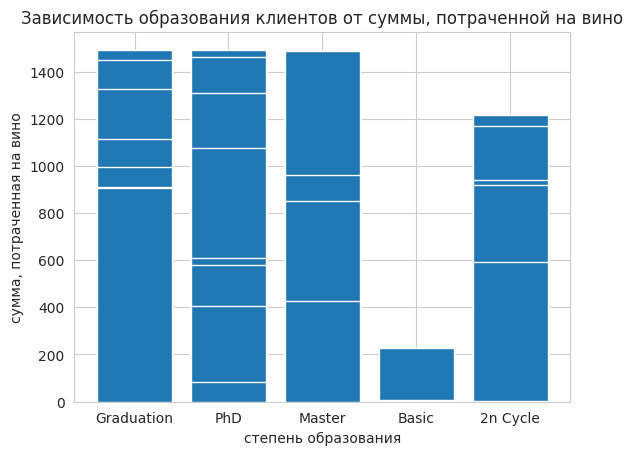

In [72]:
plt.bar(df['Education'], df['MntWines'])
plt.title('Зависимость образования клиентов от суммы, потраченной на вино')
plt.xlabel('степень образования')
plt.ylabel('сумма, потраченная на вино')
plt.show()

Люди с образованием "basic" меньше всего тратят денег на вино.

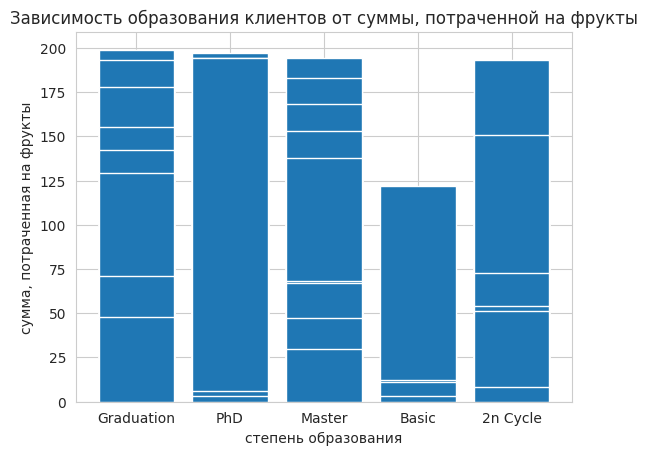

In [73]:
plt.bar(df['Education'], df['MntFruits'])
plt.title('Зависимость образования клиентов от суммы, потраченной на фрукты')
plt.xlabel('степень образования')
plt.ylabel('сумма, потраченная на фрукты')
plt.show()

Люди с образованием "basic" меньше всего тратят денег на фрукты.

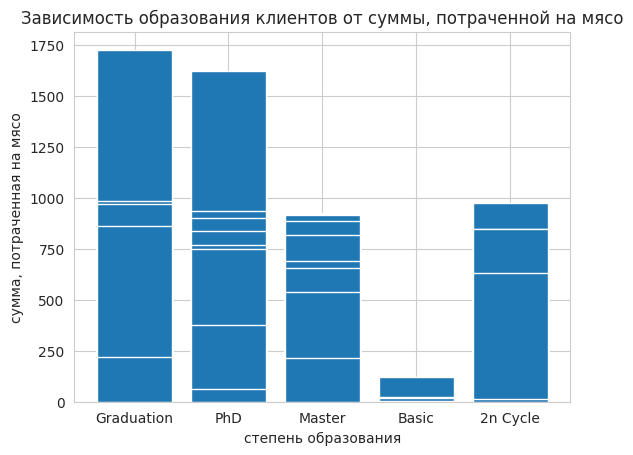

In [74]:
plt.bar(df['Education'], df['MntMeatProducts'])
plt.title('Зависимость образования клиентов от суммы, потраченной на мясо')
plt.xlabel('степень образования')
plt.ylabel('сумма, потраченная на мясо')
plt.show()

Больше денег тратят на мясо клиенты с образованием Graduation. Потом идут PhD, далее Master, 2n Cycle, и меньше всего клиенты уровня Basic.

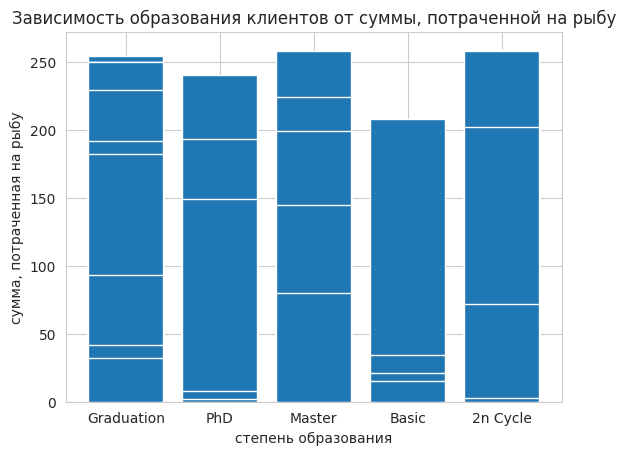

In [75]:
plt.bar(df['Education'], df['MntFishProducts'])
plt.title('Зависимость образования клиентов от суммы, потраченной на рыбу')
plt.xlabel('степень образования')
plt.ylabel('сумма, потраченная на рыбу')
plt.show()

На рыбу меньше всего тратят клиенты с образованием Basic. А больше всего клиенты с образованием Graduation, Master и 2n Cycle.

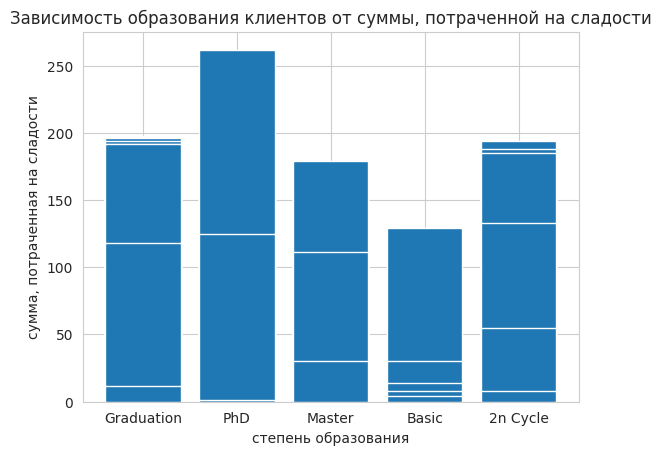

In [76]:
plt.bar(df['Education'], df['MntSweetProducts'])
plt.title('Зависимость образования клиентов от суммы, потраченной на сладости')
plt.xlabel('степень образования')
plt.ylabel('сумма, потраченная на сладости')
plt.show()

Клиенты PhD самые сладкоежки. Возможно, это связано с тем, что для активной работы мозга им требуется много быстрых углеводов.

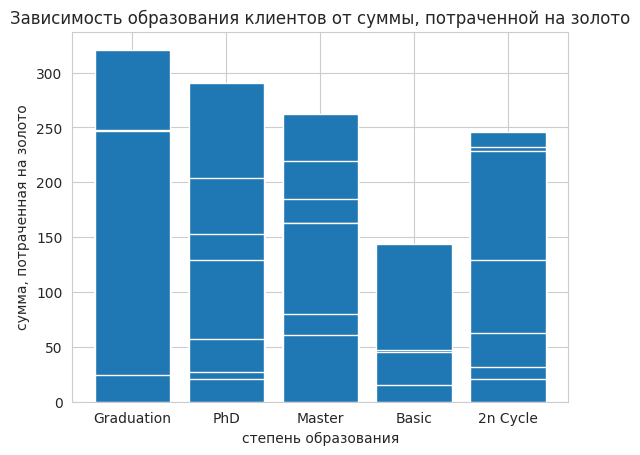

In [77]:
plt.bar(df['Education'], df['MntGoldProds'])
plt.title('Зависимость образования клиентов от суммы, потраченной на золото')
plt.xlabel('степень образования')
plt.ylabel('сумма, потраченная на золото')
plt.show()

Больше всего тратят на золото те, у кого образование Graduation, а меньше всего Basic.

**Ответ**:
1. Зависимости имеется:
- Люди с Graduate активно тратят деньги на все группы товаров, кроме сладостей.
- Люди с PhD активно тратят также на все группы.
- Master предпочитаю вино, фрукты и рыбу.
- Basic тратят меньше всего практически во всех группах товаров.
- 2n Cycle активно предпочитают фрукты и рыбу.

5. Женатые люди тратят больше или меньше денег на покупку золота?

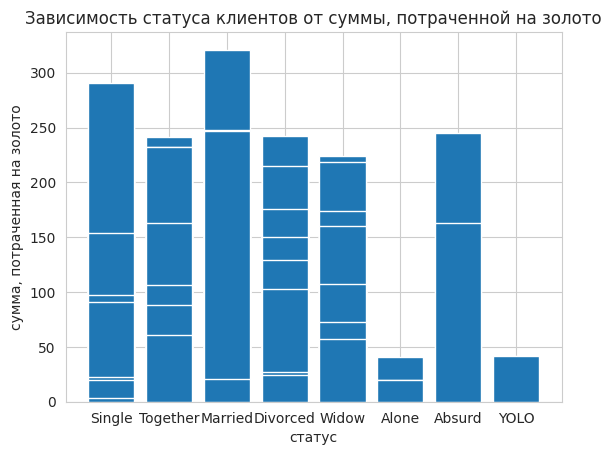

In [79]:
plt.bar(df['Marital_Status'], df['MntGoldProds'])
plt.title('Зависимость статуса клиентов от суммы, потраченной на золото')
plt.xlabel('статус')
plt.ylabel('сумма, потраченная на золото')
plt.show()

**Ответ:**
- Женатые тратят больше всего. Далее идут одинокие. И на третьем месте клиенты со статусами Absurd, Divorced и Together.

**6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?**

In [81]:
discaunt_web = df[['NumWebPurchases', 'NumDealsPurchases']]
discaunt_web.corr()

,NumWebPurchases,NumDealsPurchases
NumWebPurchases,1.000000,0.241022
NumDealsPurchases,0.241022,1.000000


**Ответ:**
- слабая корелляция, однако присутствует небольшая зависимость.

**7. Зависит ли жалоба клиента от его трат?**

In [87]:
# Добавим столбец "все траты" и сравним корелляцию относительно жалоб.

df['all_expenses'] = df['MntWines'] + df['MntFruits'] +  df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

discaunt_web = df[['Complain', 'all_expenses']]
discaunt_web.corr()

,Complain,all_expenses
Complain,1.00000,-0.03409
all_expenses,-0.03409,1.00000


Построим график для наглядности:

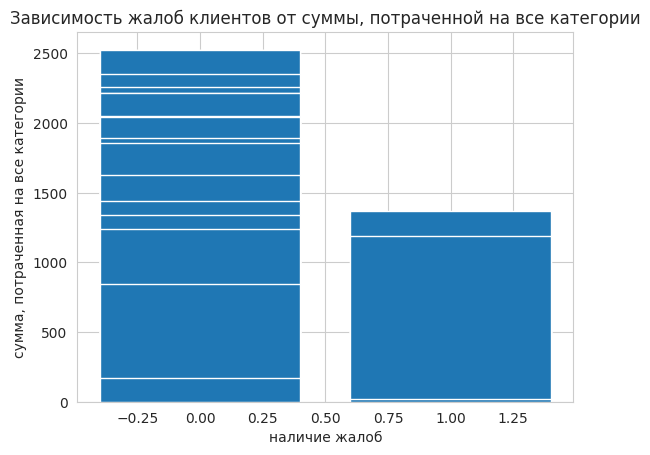

In [86]:
plt.bar(df['Complain'], df['all_expenses'])
plt.title('Зависимость жалоб клиентов от суммы, потраченной на все категории')
plt.xlabel('наличие жалоб')
plt.ylabel('сумма, потраченная на все категории')
plt.show()

**Ответ:**
- Те, кто жалуется, тратит больше

**8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?**

Построим зависимость по необходимым параметрам

In [90]:
acc = df[['all_expenses', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acc.corr()

,all_expenses,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
all_expenses,1.000000,0.381385,0.136358,0.053141,0.249183,0.468715
AcceptedCmp1,0.381385,1.000000,0.176605,0.095593,0.242706,0.409439
AcceptedCmp2,0.136358,0.176605,1.000000,0.071662,0.295023,0.222928
AcceptedCmp3,0.053141,0.095593,0.071662,1.000000,-0.079775,0.080868
AcceptedCmp4,0.249183,0.242706,0.295023,-0.079775,1.000000,0.312622
AcceptedCmp5,0.468715,0.409439,0.222928,0.080868,0.312622,1.000000


**Ответ:**
- Есть такая зависимость, что люди, принявшие предложение в последней компании тратят больше.

# Общий вывод
1. Более образованные люди тратят больше.
2. Средний возраст клиентов 54 года.
3. Те, кто жалуются, тратят больше.
4. Женатые больше тратят на золото, относительно других клиентов.
5. Клиенты в возрасте 45-50 лет активно тратят деньги на мясо и золото.